In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('A150850189_28_143_208 (1).csv', encoding='latin', sep=';', skiprows=3, skipfooter=12, decimal=',', na_values=['-'])

C:\Users\corpc34475\AppData\Local\Temp\ipykernel_15372\1414302265.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('A150850189_28_143_208 (1).csv', encoding='latin', sep=';', skiprows=3, skipfooter=12, decimal=',', na_values=['-'])


In [3]:
# Transformando a coluna Unidade da Federação em index
df_new = df.set_index('Unidade da Federação')
df_new	

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,...,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.004562e+07,1.067725e+07,1.814712e+07,1.775385e+07,1.765986e+07,1.443590e+07,1.183444e+07,7.371335e+06,1.682802e+06,1.088060e+09
12 Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.175526e+06,5.282655e+06,5.699598e+06,5.002273e+06,4.326882e+06,3.458187e+06,2.302711e+06,1.196755e+06,NaN,4.752903e+08
13 Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.740646e+07,2.234104e+07,2.792379e+07,2.451592e+07,2.397354e+07,2.217540e+07,2.161494e+07,1.380696e+07,5.292323e+06,2.061943e+09
14 Roraima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.557822e+06,4.172286e+06,5.427227e+06,4.192541e+06,3.681418e+06,3.475206e+06,3.320808e+06,2.907871e+06,1.496815e+06,3.525463e+08
15 Pará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.904235e+07,3.711344e+07,4.962542e+07,5.255833e+07,5.090723e+07,4.387659e+07,3.371808e+07,2.083787e+07,4.620263e+06,4.968812e+09
16 Amapá,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.786277e+06,2.664375e+06,3.960131e+06,5.153705e+06,5.672087e+06,5.469150e+06,4.136951e+06,1.875242e+06,6.267514e+05,3.371820e+08
17 Tocantins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.868699e+06,9.098989e+06,1.012971e+07,9.762981e+06,1.016178e+07,6.349488e+06,4.610171e+06,2.304080e+06,3.123547e+05,1.110345e+09
21 Maranhão,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.121035e+07,3.582465e+07,5.431570e+07,5.179777e+07,5.532468e+07,5.195857e+07,3.777543e+07,2.577967e+07,1.119466e+07,4.161326e+09
22 Piauí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.183911e+07,2.041470e+07,3.158648e+07,3.236725e+07,3.255078e+07,2.601580e+07,1.997285e+07,1.522089e+07,9.371428e+06,2.450509e+09


In [15]:
# Selecionando colunas que tem todos os valores númericos preenchidos
# df_describe = df_new.describe().T
# columns_to_select = df_describe[df_describe['count'] == df_new.shape[0]].index

# columns_to_select

# df_new = df_new[columns_to_select]


df_count_not_nulls = df_new.notnull().sum() # Contando o número de linhas NA's em cada coluna
columns_to_select = df_count_not_nulls.where(df_count_not_nulls == df_new.shape[0]).dropna().index # Selecionando colunas com todas as linhas preenchidas
df_new = df_new[columns_to_select] # Selecionando as colunas selecionadas

In [47]:
type(axis)

matplotlib.axes._axes.Axes

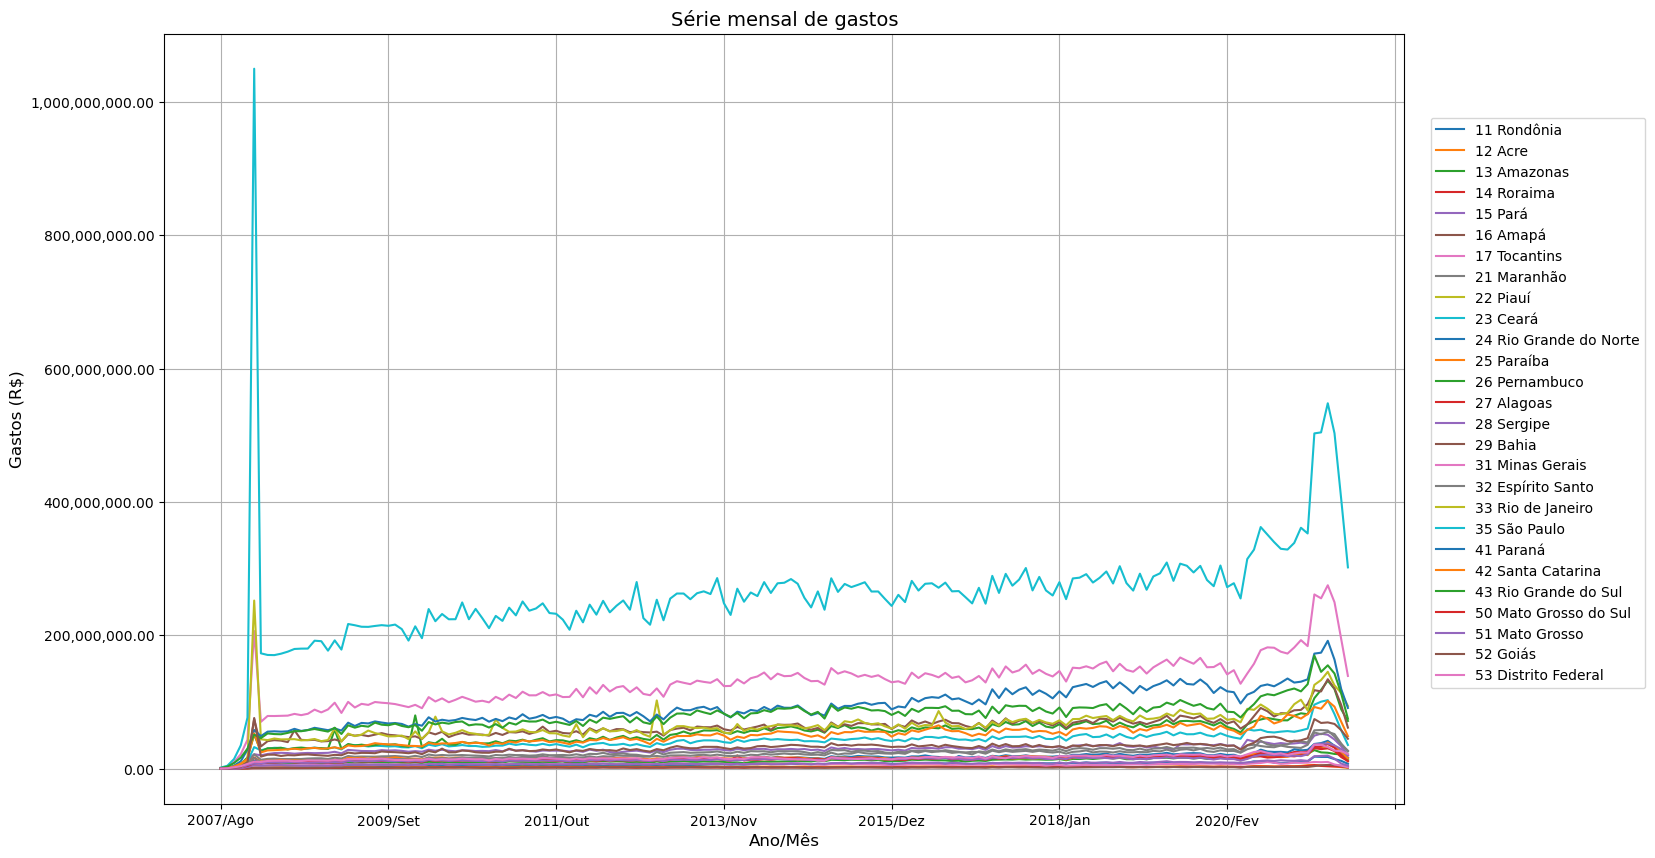

In [17]:
import matplotlib.ticker as ticker

axis = df_new.drop('Total', axis=1).T.plot(figsize=(16,10))
axis.legend(loc='upper right', bbox_to_anchor=(1.2,0.9))
axis.set_xlabel('Ano/Mês', fontsize=12)
axis.set_ylabel('Gastos (R$)', fontsize=12)
axis.set_title('Série mensal de gastos', fontsize=14)
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
axis.grid(True)

plt.show()

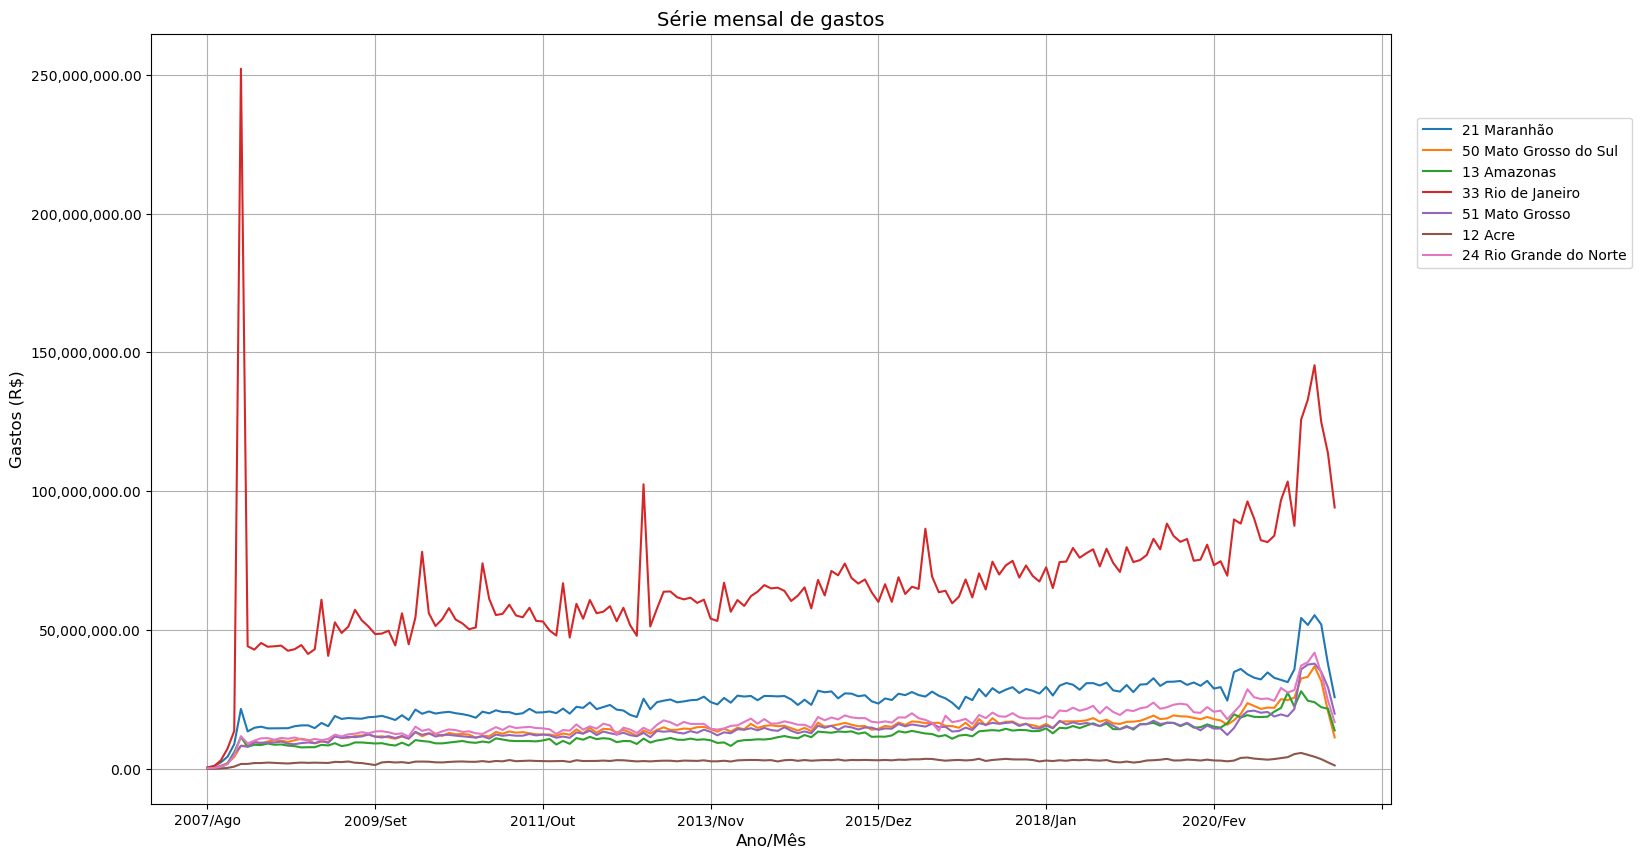

In [68]:
# Gráfico com uma amostra de 7 estados
np.random.seed(13289)

df_sample = df_new.sample(n=7)

axis = df_sample.drop('Total', axis=1).T.plot(figsize=(16,10))
axis.legend(loc='upper right', bbox_to_anchor=(1.2,0.9))
axis.set_xlabel('Ano/Mês', fontsize=12)
axis.set_ylabel('Gastos (R$)', fontsize=12)
axis.set_title('Série mensal de gastos', fontsize=14)
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
axis.grid(True)

plt.show()

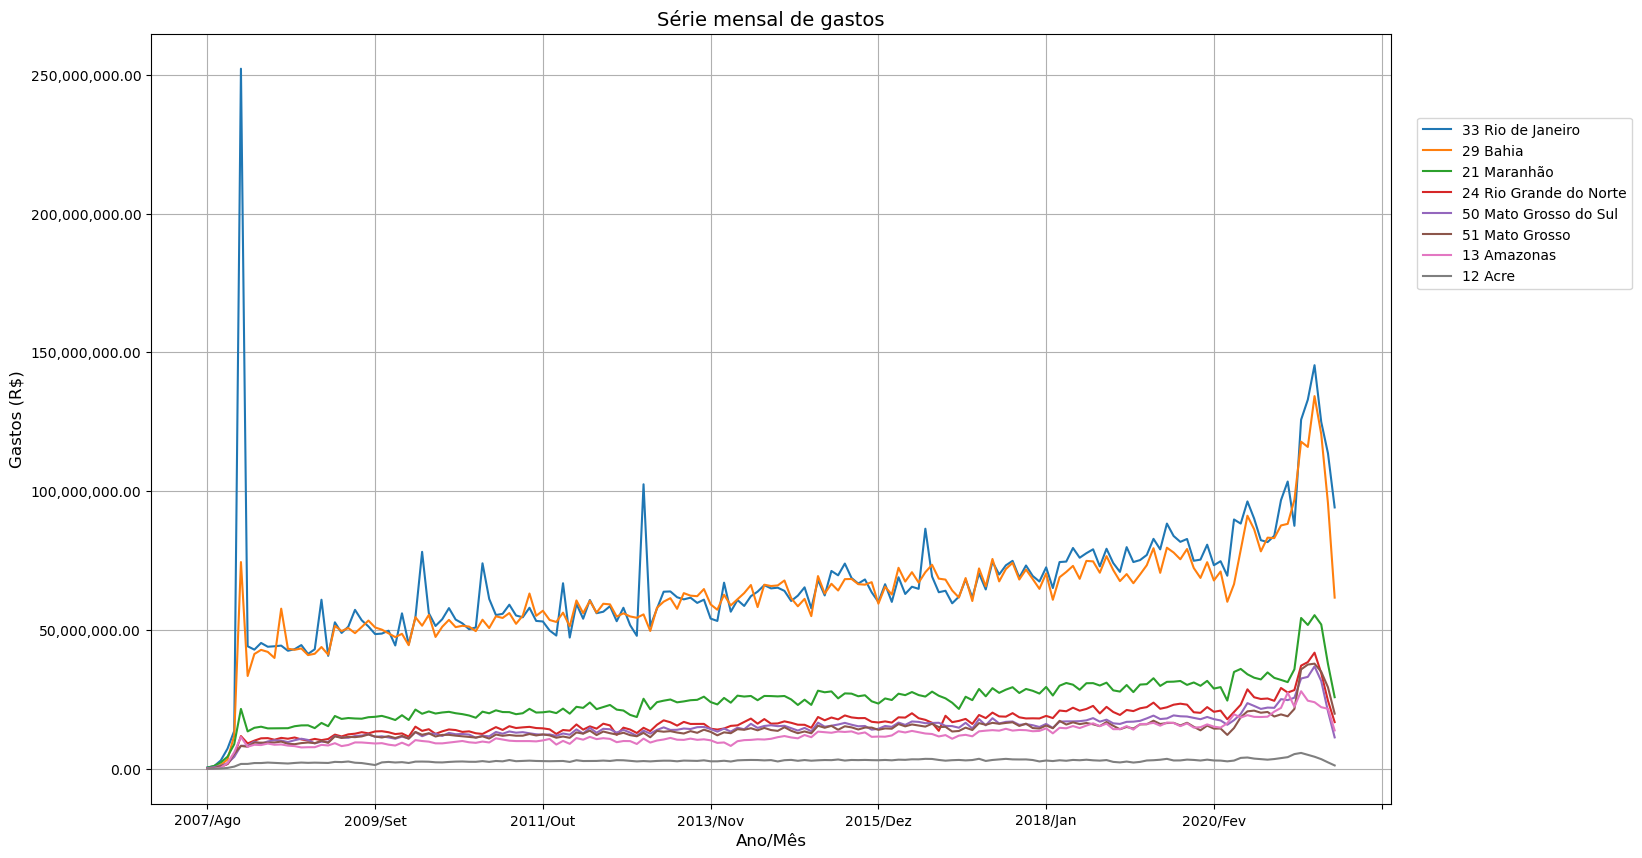

In [89]:
# Adicionando um novo estado ao df_sample. Adicionando SP
df_sample_2 = pd.concat([df_sample, df_new.loc['29 Bahia'].to_frame().T])

# Ordenando as linhas
df_sample_2 = df_sample_2.sort_values(by='Total', ascending=False)

# Gráfico com o novo estado
axis = df_sample_2.drop('Total', axis=1).T.plot(figsize=(16,10))
axis.legend(loc='upper right', bbox_to_anchor=(1.2,0.9))
axis.set_xlabel('Ano/Mês', fontsize=12)
axis.set_ylabel('Gastos (R$)', fontsize=12)
axis.set_title('Série mensal de gastos', fontsize=14)
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
axis.grid(True)

plt.show()

In [81]:
# Função para plotar gráfico
def plot_series_gastos(df, figsize=(16,10), xlabel='Ano/Mês', ylabel='Gastos (R$)'):
    axis = df.sort_values(by='Total', ascending=False).drop('Total', axis=1).T.plot(figsize=figsize, colormap='tab20')
    axis.legend(loc='upper right', bbox_to_anchor=(1.2,0.9))
    axis.set_xlabel(xlabel, fontsize=12)
    axis.set_ylabel(ylabel, fontsize=12)
    axis.set_title('Série mensal de gastos', fontsize=14)
    axis.xaxis.set_major_locator(ticker.MultipleLocator(base=12))
    axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
    axis.grid(True)

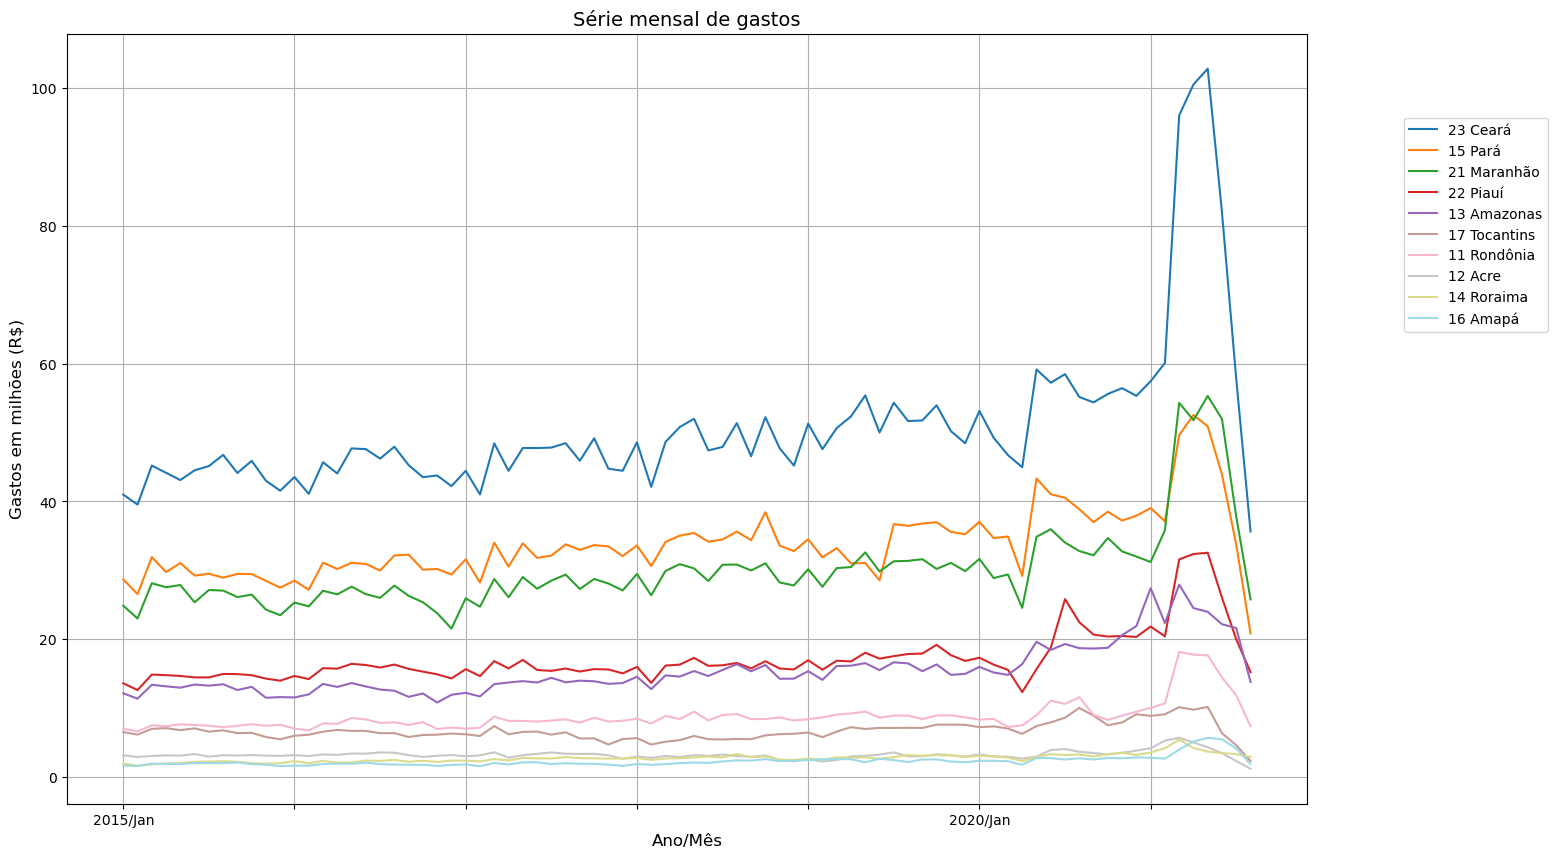

In [82]:
plot_series_gastos(df=df_new.iloc[:,89:].head(10) / 1_000_000, ylabel='Gastos em milhões (R$)')

In [86]:
df[df.columns[-12:]]

,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,Total
0,8.909540e+06,9.469279e+06,1.004562e+07,1.067725e+07,1.814712e+07,1.775385e+07,1.765986e+07,1.443590e+07,1.183444e+07,7.371335e+06,1.682802e+06,1.088060e+09
1,3.497348e+06,3.820866e+06,4.175526e+06,5.282655e+06,5.699598e+06,5.002273e+06,4.326882e+06,3.458187e+06,2.302711e+06,1.196755e+06,NaN,4.752903e+08
2,2.058741e+07,2.191121e+07,2.740646e+07,2.234104e+07,2.792379e+07,2.451592e+07,2.397354e+07,2.217540e+07,2.161494e+07,1.380696e+07,5.292323e+06,2.061943e+09
3,3.531874e+06,3.193709e+06,3.557822e+06,4.172286e+06,5.427227e+06,4.192541e+06,3.681418e+06,3.475206e+06,3.320808e+06,2.907871e+06,1.496815e+06,3.525463e+08
4,3.722824e+07,3.792551e+07,3.904235e+07,3.711344e+07,4.962542e+07,5.255833e+07,5.090723e+07,4.387659e+07,3.371808e+07,2.083787e+07,4.620263e+06,4.968812e+09
5,2.714711e+06,2.841470e+06,2.786277e+06,2.664375e+06,3.960131e+06,5.153705e+06,5.672087e+06,5.469150e+06,4.136951e+06,1.875242e+06,6.267514e+05,3.371820e+08
6,7.909741e+06,9.104100e+06,8.868699e+06,9.098989e+06,1.012971e+07,9.762981e+06,1.016178e+07,6.349488e+06,4.610171e+06,2.304080e+06,3.123547e+05,1.110345e+09
7,3.273937e+07,3.200370e+07,3.121035e+07,3.582465e+07,5.431570e+07,5.179777e+07,5.532468e+07,5.195857e+07,3.777543e+07,2.577967e+07,1.119466e+07,4.161326e+09
8,2.046688e+07,2.033121e+07,2.183911e+07,2.041470e+07,3.158648e+07,3.236725e+07,3.255078e+07,2.601580e+07,1.997285e+07,1.522089e+07,9.371428e+06,2.450509e+09
9,5.644842e+07,5.533192e+07,5.745159e+07,6.010552e+07,9.606387e+07,1.005437e+08,1.028260e+08,8.191945e+07,5.772714e+07,3.565001e+07,1.623460e+07,7.118540e+09
